# Material/Conteúdo de aula do dia 3

* Importando dados do MS Excel
* Filtros de dataframe
* Gráficos (Matplotlib, Seaborn e Plotly)
* Dicionário e sets

## Dados externos



* Artigo no periódico Scientific Data: [Halbritter et al. (2024)](https://www.nature.com/articles/s41597-024-02980-3)
* [Repositório do GitHub](https://github.com/Plant-Functional-Trait-Course/pftc3_punaproject_pftc5)
* Dados associados no OSF: [PFTCourses, Elevational Gradient, Puna Project and Fire Experiment, Wayquecha, Peru](https://osf.io/gs8u6/)


Figura 1 do artigo de [Halbritter et al. (2024)](https://www.nature.com/articles/s41597-024-02980-3):

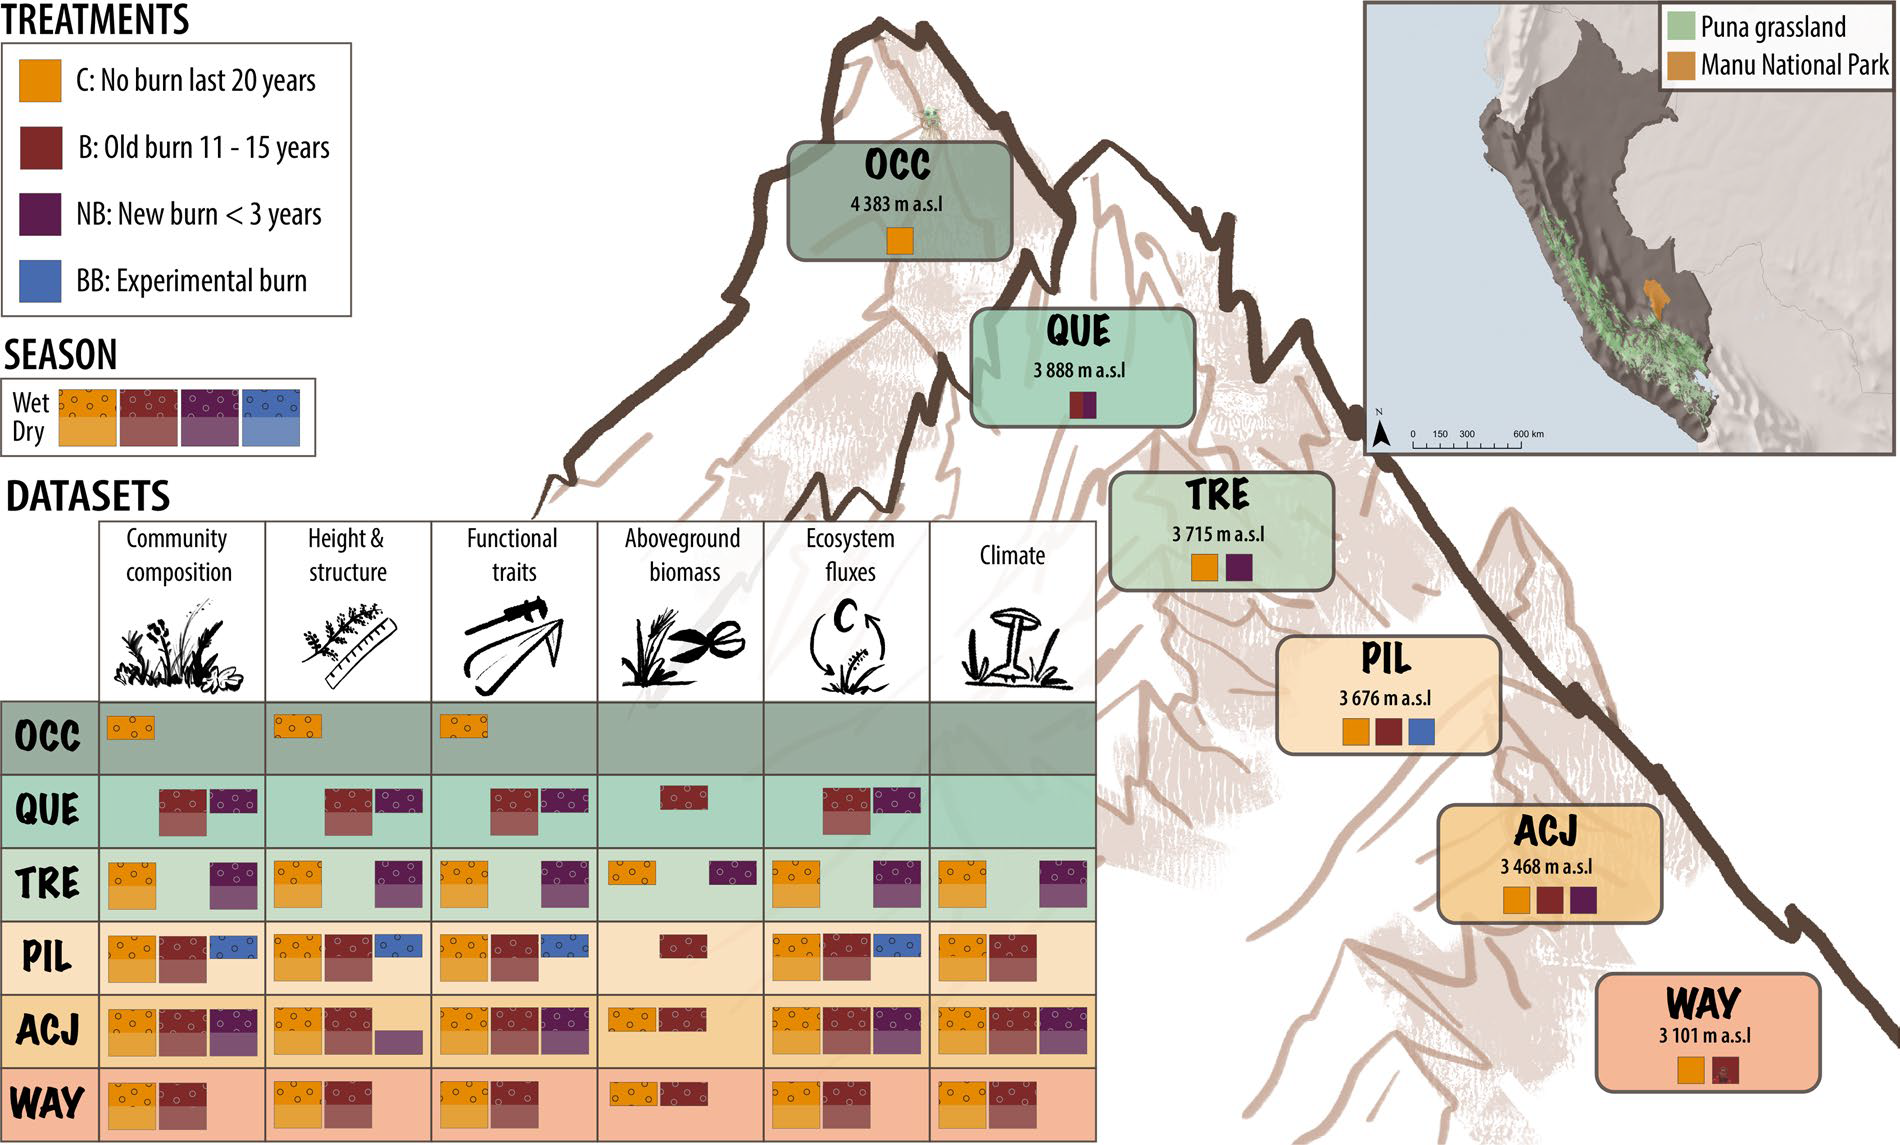

# Importando e explorando dados de tabelas com pandas

In [1]:
import pandas as pd

Arquivos interessantes no repositório da publicação:

* PFTC3-Puna-PFTC5_Peru_2018-2020_CommunityCover_clean.csv
* PFTC3-Puna-Peru_2018-2019_CommunityStructure_clean.csv
* PFTC3-Puna-PFTC5_Peru_2018-2020_FunctionalTraits_clean.csv

In [20]:
pftc5_functional_traits_clean = pd.read_csv('/content/PFTC3-Puna-PFTC5_Peru_2018-2020_FunctionalTraits_clean.csv')

<ipython-input-20-1082928492>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  pftc5_functional_traits_clean = pd.read_csv('/content/PFTC3-Puna-PFTC5_Peru_2018-2020_FunctionalTraits_clean.csv')


Aproveitando o aviso (`DtypeWarning: Columns (5) have mixed types`), vamos olhar para os dados nesta coluna.

Lembrem-se que Series apresentam apenas um único tipo de dado e o ideal é termos dados do mesmo tipo distribuídos ao longo de uma coluna de DataFrame. Vamos inspecionar o "aviso" e olhar para os tipos de dados importados e corrigir.

Podemos recuperar a quinta coluna usando o método `.iloc` que vimos no segundo dia de curso:

In [27]:
pftc5_functional_traits_clean.iloc[:, 5]

,plot_id
0,3
1,3
2,3
3,3
4,3
...,...
54036,3
54037,3
54038,3
54039,3


In [21]:
pftc5_functional_traits_clean.plot_id.unique()

array(['3', '2', '1', '5', '4', 'General', 2, 3, 4, 5, 1], dtype=object)

In [28]:
types = pftc5_functional_traits_clean.iloc[:, 5].apply(type)
print(types.unique())

[<class 'str'> <class 'int'>]


Lembrando que quando quisermos podemos olhar diretamente a ajuda de funções ou métodos:

In [ ]:
?pd.read_csv

Para facilitar a leitura de códigos, a recomendação (PEP 8) é manter no máximo 79 caracteres por linha de código:

In [29]:
pftc5_functional_traits_clean = pd.read_csv('/content/PFTC3-Puna-PFTC5_Peru_2018-2020_FunctionalTraits_clean.csv',
                                            low_memory=False)

In [30]:
pftc5_functional_traits_clean.plot_id.unique()

array(['3', '2', '1', '5', '4', 'General'], dtype=object)

In [33]:
types = pftc5_functional_traits_clean.iloc[:, 5].apply(type)
print(types.unique())

[<class 'str'>]


Tabela 4 do artigo de [Halbritter et al. (2024)](https://www.nature.com/articles/s41597-024-02980-3):

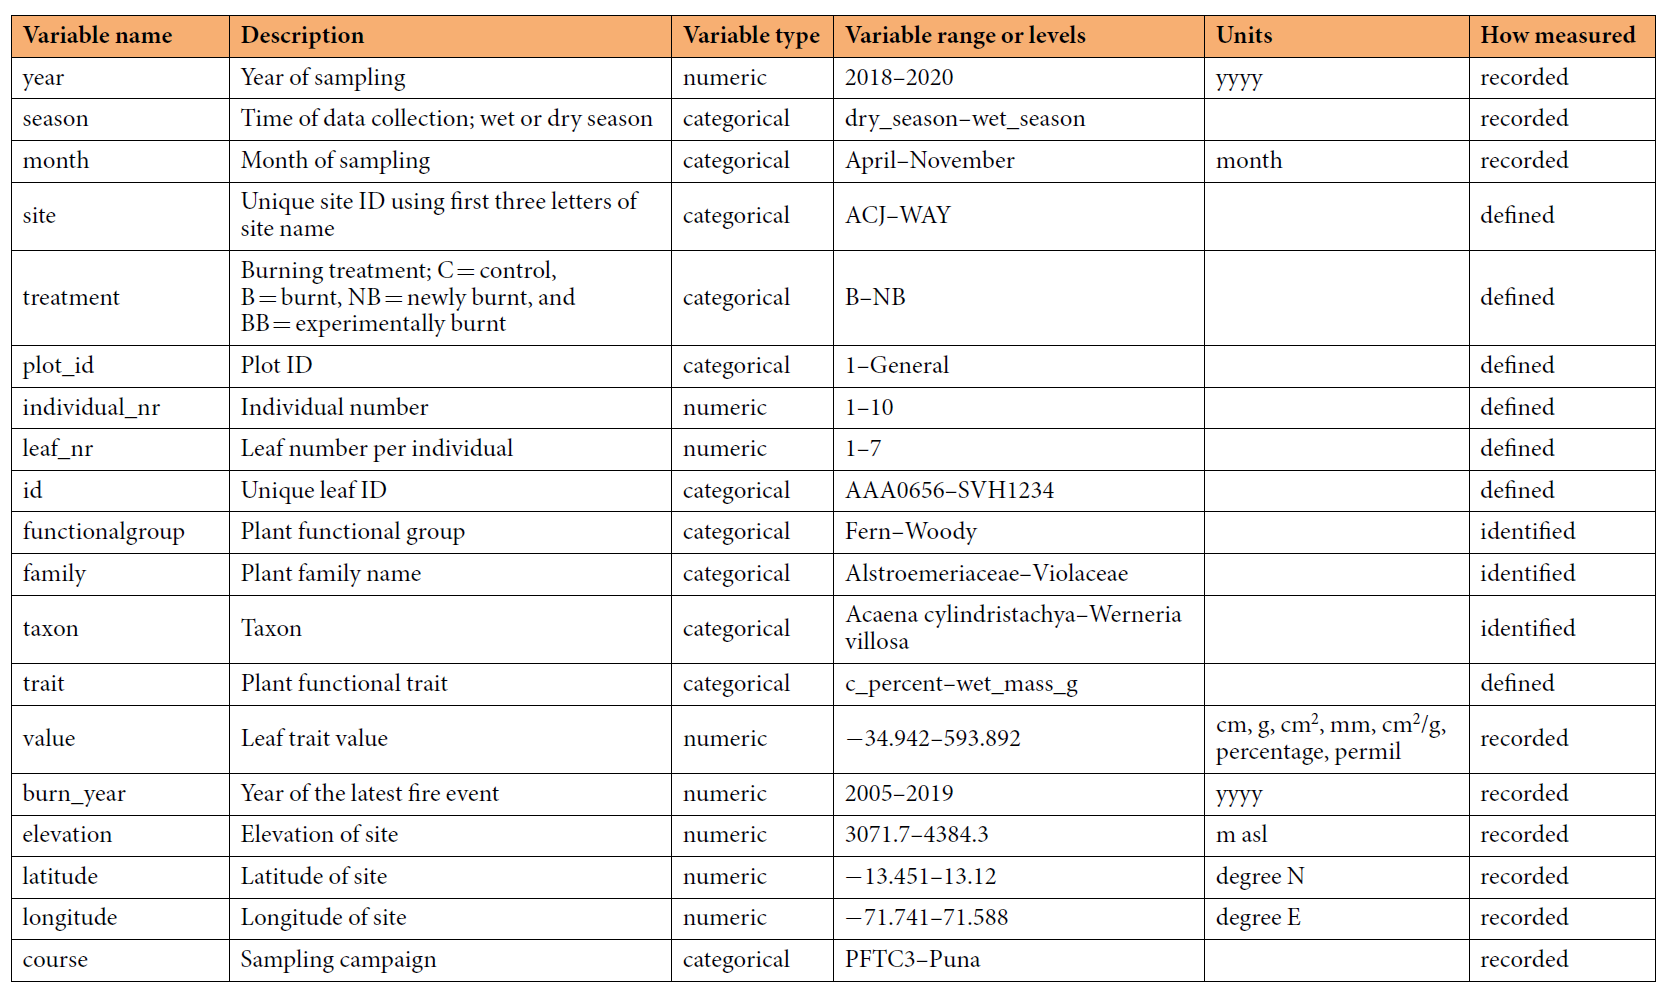

Analisando os tipos de dados em cada coluna do DataFrame:

In [32]:
pftc5_functional_traits_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54041 entries, 0 to 54040
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              54041 non-null  int64  
 1   season            54041 non-null  object 
 2   month             54041 non-null  object 
 3   site              54041 non-null  object 
 4   treatment         54041 non-null  object 
 5   plot_id           54041 non-null  object 
 6   individual_nr     53930 non-null  float64
 7   leaf_nr           7122 non-null   float64
 8   id                54040 non-null  object 
 9   functional_group  54041 non-null  object 
 10  family            54041 non-null  object 
 11  taxon             54041 non-null  object 
 12  trait             54041 non-null  object 
 13  value             54041 non-null  float64
 14  burn_year         27304 non-null  float64
 15  elevation         53906 non-null  float64
 16  latitude          53906 non-null  float6

Contando registros associados a cada ano:

In [34]:
pftc5_functional_traits_clean.year.value_counts()

,count
year,
2018,24394
2019,18292
2020,11355


Contando registros de famílias de plantas no dataset:

In [49]:
pftc5_functional_traits_clean.family.value_counts().head()

,count
family,
Poaceae,14515
Cyperaceae,8962
Asteraceae,7775
Ericaceae,6487
Gentianaceae,3321


## Selecionando e filtrando dados em DataFrames

Existem muitas plantas do meu interesse em pesquisa na família Poaceae. Vamos olhar um pouco para os dados desta família:

In [56]:
pftc5_functional_traits_clean[pftc5_functional_traits_clean.family == 'Poaceae']

,year,season,month,site,treatment,plot_id,individual_nr,leaf_nr,id,functional_group,family,taxon,trait,value,burn_year,elevation,latitude,longitude,course
21,2018,wet_season,March,QUE,B,1,3.0,NaN,CDU8518,Graminoid,Poaceae,Polypogon sp,plant_height_cm,3.000000,2005.0,3882.9,-13.213786,-71.619294,PFTC3
22,2018,wet_season,March,QUE,B,1,3.0,NaN,CDU8518,Graminoid,Poaceae,Polypogon sp,wet_mass_g,0.001500,2005.0,3882.9,-13.213786,-71.619294,PFTC3
23,2018,wet_season,March,QUE,B,1,3.0,NaN,CDU8518,Graminoid,Poaceae,Polypogon sp,dry_mass_g,0.000600,2005.0,3882.9,-13.213786,-71.619294,PFTC3
24,2018,wet_season,March,QUE,B,1,3.0,NaN,CDU8518,Graminoid,Poaceae,Polypogon sp,leaf_area_cm2,0.066900,2005.0,3882.9,-13.213786,-71.619294,PFTC3
25,2018,wet_season,March,QUE,B,1,3.0,NaN,CDU8518,Graminoid,Poaceae,Polypogon sp,sla_cm2_g,44.600000,2005.0,3882.9,-13.213786,-71.619294,PFTC3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54029,2020,wet_season,March,TRE,C,1,11.0,4.0,CYA3349,Graminoid,Poaceae,Paspalum bonplandianum,dry_mass_g,0.010300,NaN,3714.3,-13.119746,-71.620771,PFTC5
54030,2020,wet_season,March,TRE,C,1,11.0,4.0,CYA3349,Graminoid,Poaceae,Paspalum bonplandianum,leaf_area_cm2,4.045000,NaN,3714.3,-13.119746,-71.620771,PFTC5
54031,2020,wet_season,March,TRE,C,1,11.0,4.0,CYA3349,Graminoid,Poaceae,Paspalum bonplandianum,sla_cm2_g,392.718447,NaN,3714.3,-13.119746,-71.620771,PFTC5
54032,2020,wet_season,March,TRE,C,1,11.0,4.0,CYA3349,Graminoid,Poaceae,Paspalum bonplandianum,ldmc,0.228889,NaN,3714.3,-13.119746,-71.620771,PFTC5


❌ seção incompleta. Exemplificar casos em que o uso de `.copy()` é importante/necessário.

In [76]:
pftc5_functional_traits_clean_poaceae = pftc5_functional_traits_clean[pftc5_functional_traits_clean.family == 'Poaceae'].copy()

In [77]:
pftc5_functional_traits_clean_poaceae

,year,season,month,site,treatment,plot_id,individual_nr,leaf_nr,id,functional_group,family,taxon,trait,value,burn_year,elevation,latitude,longitude,course
21,2018,wet_season,March,QUE,B,1,3.0,NaN,CDU8518,Graminoid,Poaceae,Polypogon sp,plant_height_cm,3.000000,2005.0,3882.9,-13.213786,-71.619294,PFTC3
22,2018,wet_season,March,QUE,B,1,3.0,NaN,CDU8518,Graminoid,Poaceae,Polypogon sp,wet_mass_g,0.001500,2005.0,3882.9,-13.213786,-71.619294,PFTC3
23,2018,wet_season,March,QUE,B,1,3.0,NaN,CDU8518,Graminoid,Poaceae,Polypogon sp,dry_mass_g,0.000600,2005.0,3882.9,-13.213786,-71.619294,PFTC3
24,2018,wet_season,March,QUE,B,1,3.0,NaN,CDU8518,Graminoid,Poaceae,Polypogon sp,leaf_area_cm2,0.066900,2005.0,3882.9,-13.213786,-71.619294,PFTC3
25,2018,wet_season,March,QUE,B,1,3.0,NaN,CDU8518,Graminoid,Poaceae,Polypogon sp,sla_cm2_g,44.600000,2005.0,3882.9,-13.213786,-71.619294,PFTC3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54029,2020,wet_season,March,TRE,C,1,11.0,4.0,CYA3349,Graminoid,Poaceae,Paspalum bonplandianum,dry_mass_g,0.010300,NaN,3714.3,-13.119746,-71.620771,PFTC5
54030,2020,wet_season,March,TRE,C,1,11.0,4.0,CYA3349,Graminoid,Poaceae,Paspalum bonplandianum,leaf_area_cm2,4.045000,NaN,3714.3,-13.119746,-71.620771,PFTC5
54031,2020,wet_season,March,TRE,C,1,11.0,4.0,CYA3349,Graminoid,Poaceae,Paspalum bonplandianum,sla_cm2_g,392.718447,NaN,3714.3,-13.119746,-71.620771,PFTC5
54032,2020,wet_season,March,TRE,C,1,11.0,4.0,CYA3349,Graminoid,Poaceae,Paspalum bonplandianum,ldmc,0.228889,NaN,3714.3,-13.119746,-71.620771,PFTC5


Vamos recuperar as espécies de Poaceae com o maior número de registros na tabela:

In [78]:
pftc5_functional_traits_clean_poaceae[pftc5_functional_traits_clean_poaceae.family == 'Poaceae'].taxon.value_counts().head(n=10)

,count
taxon,
Calamagrostis tarmensis,3237
Paspalum bonplandianum,2611
Festuca dolichophylla,2423
Polypogon sp,2148
Calamagrostis cf. amoena,789
Bromus lanatus,690
Cortaderia bifida,428
Danthonia secundiflora,380
Calamagrostis rigida,361


Regiões (sites):

* Acjanaco (ACJ)
* Ocoruro (OCC)
* Pilco Grande (PIL)
* Quello Casa (QUE)
* Tres Cruzes (TRE)
* Wayqecha (WAY)

Categorias de acordo com queimadas (Burning treatments):

* C = control
* B = burnt
* NB = newly burnt
* BB = experimentally burnt

Para cada sítio e "tratamento", foram analisados cinco "plots" (1, 2, 3, 4, 5).

In [83]:
pftc5_functional_traits_clean_poaceae_site_treatment = pftc5_functional_traits_clean_poaceae.groupby(['site', 'treatment'])

Este é o objeto da classe `DataFrameGroupBy` criado:

In [91]:
pftc5_functional_traits_clean_poaceae_site_treatment

Podemos utilizá-lo para recuperar estatísticas ou fazer análises por grupo usando o método `.size()`:

In [95]:
help(pftc5_functional_traits_clean_poaceae_site_treatment.size)

Help on method size in module pandas.core.groupby.groupby:

size() -> 'DataFrame | Series' method of pandas.core.groupby.generic.DataFrameGroupBy instance
    Compute group sizes.
    
    Returns
    -------
    DataFrame or Series
        Number of rows in each group as a Series if as_index is True
        or a DataFrame if as_index is False.
    
    See Also
    --------
    Series.groupby : Apply a function groupby to a Series.
    DataFrame.groupby : Apply a function groupby
        to each row or column of a DataFrame.
    
    Examples
    --------
    
    For SeriesGroupBy:
    
    >>> lst = ['a', 'a', 'b']
    >>> ser = pd.Series([1, 2, 3], index=lst)
    >>> ser
    a     1
    a     2
    b     3
    dtype: int64
    >>> ser.groupby(level=0).size()
    a    2
    b    1
    dtype: int64
    
    >>> data = [[1, 2, 3], [1, 5, 6], [7, 8, 9]]
    >>> df = pd.DataFrame(data, columns=["a", "b", "c"],
    ...                   index=["owl", "toucan", "eagle"])
    >>> df
      

In [97]:
help(pftc5_functional_traits_clean_poaceae_site_treatment.size)

Help on method size in module pandas.core.groupby.groupby:

size() -> 'DataFrame | Series' method of pandas.core.groupby.generic.DataFrameGroupBy instance
    Compute group sizes.
    
    Returns
    -------
    DataFrame or Series
        Number of rows in each group as a Series if as_index is True
        or a DataFrame if as_index is False.
    
    See Also
    --------
    Series.groupby : Apply a function groupby to a Series.
    DataFrame.groupby : Apply a function groupby
        to each row or column of a DataFrame.
    
    Examples
    --------
    
    For SeriesGroupBy:
    
    >>> lst = ['a', 'a', 'b']
    >>> ser = pd.Series([1, 2, 3], index=lst)
    >>> ser
    a     1
    a     2
    b     3
    dtype: int64
    >>> ser.groupby(level=0).size()
    a    2
    b    1
    dtype: int64
    
    >>> data = [[1, 2, 3], [1, 5, 6], [7, 8, 9]]
    >>> df = pd.DataFrame(data, columns=["a", "b", "c"],
    ...                   index=["owl", "toucan", "eagle"])
    >>> df
      

In [86]:
pftc5_functional_traits_clean_poaceae_site_treatment.size()

site  treatment
ACJ   B            1186
      C            1521
      NB            869
OCC   C              90
PIL   B            1282
      BB            374
      C            1631
QUE   B            1503
      NB            575
TRE   C            1821
      NB            735
WAY   B            1113
      C            1815
dtype: int64

O método `.unstack()` gera uma tabela no formato wide:

In [87]:
pftc5_functional_traits_clean_poaceae_site_treatment.size().unstack()

treatment,B,BB,C,NB
site,,,,
ACJ,1186.0,NaN,1521.0,869.0
OCC,NaN,NaN,90.0,NaN
PIL,1282.0,374.0,1631.0,NaN
QUE,1503.0,NaN,NaN,575.0
TRE,NaN,NaN,1821.0,735.0
WAY,1113.0,NaN,1815.0,NaN


O método `.fillna()` permite preencher com determinado valor os NaN:

In [89]:
pftc5_functional_traits_clean_poaceae_site_treatment.size().unstack().fillna(0)

treatment,B,BB,C,NB
site,,,,
ACJ,1186.0,0.0,1521.0,869.0
OCC,0.0,0.0,90.0,0.0
PIL,1282.0,374.0,1631.0,0.0
QUE,1503.0,0.0,0.0,575.0
TRE,0.0,0.0,1821.0,735.0
WAY,1113.0,0.0,1815.0,0.0


## Recuperando dados para uma espécie

❌ seção incompleta. Exemplificar casos em que o uso de `.copy()` é importante/necessário.

Vamos olhar apenas para dados de *Calamagrostis tarmensis*:

In [129]:
pftc5_functional_traits_clean_c_tarmensis = pftc5_functional_traits_clean_poaceae[pftc5_functional_traits_clean['taxon'] == 'Calamagrostis tarmensis'].copy()

<ipython-input-129-1229524520>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pftc5_functional_traits_clean_c_tarmensis = pftc5_functional_traits_clean_poaceae[pftc5_functional_traits_clean['taxon'] == 'Calamagrostis tarmensis'].copy()


In [130]:
pftc5_functional_traits_clean_c_tarmensis.columns

Index(['year', 'season', 'month', 'site', 'treatment', 'plot_id',
       'individual_nr', 'leaf_nr', 'id', 'functional_group', 'family', 'taxon',
       'trait', 'value', 'burn_year', 'elevation', 'latitude', 'longitude',
       'course'],
      dtype='object')

O método `.drop()` pode ser usado para remover colunas do nosso DataFrame. Vamos remover aquelas que não pretendemos utilizar:

In [131]:
pftc5_functional_traits_clean_c_tarmensis = pftc5_functional_traits_clean_c_tarmensis.drop(columns=['elevation', 'latitude', 'longitude', 'functional_group', 'family', 'taxon', 'burn_year', 'course', 'month'])

In [140]:
pftc5_functional_traits_clean_c_tarmensis.columns

Index(['year', 'season', 'site', 'treatment', 'plot_id', 'individual_nr',
       'leaf_nr', 'id', 'trait', 'value'],
      dtype='object')

## Atributos disponíveis para plantas e folhas (uma espécie)

* Plant height (plant_height_cm)
* Wet mass (wet_mass_g)
* Dry mass (dry_mass_g)
* Leaf area (leaf_area_cm2)
* Leaf thickness (leaf_thickness_mm)
* Specific leaf area (sla_cm2_g)
* Leaf dry matter content (LDMC)
* Leaf carbon content (c_percent)
* Leaf nitrogen content (n_percent)
* Leaf phosphorus content (p_percent)
* CN and NP ratio (np_ratio)
* d13C and d15N isotope ratio (cn_ratio)

In [133]:
#pftc5_functional_traits_clean_poaceae[pftc5_functional_traits_clean_poaceae.family == 'Poaceae'].trait.value_counts()
pftc5_functional_traits_clean_c_tarmensis.trait.value_counts()

,count
trait,
leaf_thickness_mm,411
plant_height_cm,410
leaf_area_cm2,410
wet_mass_g,409
sla_cm2_g,409
dry_mass_g,409
ldmc,408
c_percent,81
n_percent,81


In [135]:
pftc5_functional_traits_clean_c_tarmensis[pftc5_functional_traits_clean_c_tarmensis['trait'] == 'leaf_area_cm2'].season.value_counts()

,count
season,
wet_season,304
dry_season,106


In [136]:
pftc5_functional_traits_clean_c_tarmensis[pftc5_functional_traits_clean_c_tarmensis['trait'] == 'leaf_area_cm2'].year.value_counts()

,count
year,
2018,193
2019,160
2020,57


In [137]:
pftc5_functional_traits_clean_c_tarmensis[pftc5_functional_traits_clean_c_tarmensis['trait'] == 'leaf_area_cm2'].site.value_counts()

,count
site,
ACJ,159
PIL,107
TRE,91
QUE,30
WAY,23


In [139]:
pftc5_functional_traits_clean_c_tarmensis[pftc5_functional_traits_clean_c_tarmensis['trait'] == 'leaf_area_cm2'].treatment.value_counts()

,count
treatment,
C,143
B,136
NB,113
BB,18


## Agrupando dados de área foliar (uma espécie)

In [149]:
c_tarmensis_leaf_area_groups = pftc5_functional_traits_clean_c_tarmensis[pftc5_functional_traits_clean_c_tarmensis['trait'] == 'leaf_area_cm2']\
  .groupby(['site', 'treatment', 'season', 'year'])

In [150]:
c_tarmensis_leaf_area_groups.size()

site  treatment  season      year
ACJ   B          dry_season  2019     9
                 wet_season  2018    29
                             2019    29
      C          dry_season  2019     9
                 wet_season  2018    31
      NB         dry_season  2019    34
                 wet_season  2020    17
PIL   B          dry_season  2019    11
                 wet_season  2018    25
      BB         wet_season  2018    18
      C          dry_season  2019    14
                 wet_season  2018    39
QUE   B          dry_season  2019     3
                 wet_season  2018    15
      NB         wet_season  2020    12
TRE   C          dry_season  2019    11
                 wet_season  2018    19
                             2020    12
      NB         dry_season  2019     9
                 wet_season  2019    25
                             2020    15
WAY   B          dry_season  2019     6
                 wet_season  2018     9
      C          wet_season  2018     9
dtype: int64

In [165]:
c_tarmensis_leaf_area_groups.size().unstack().fillna(0)

year                       2018  2019  2020
site treatment season                      
ACJ  B         dry_season   0.0   9.0   0.0
               wet_season  29.0  29.0   0.0
     C         dry_season   0.0   9.0   0.0
               wet_season  31.0   0.0   0.0
     NB        dry_season   0.0  34.0   0.0
               wet_season   0.0   0.0  17.0
PIL  B         dry_season   0.0  11.0   0.0
               wet_season  25.0   0.0   0.0
     BB        wet_season  18.0   0.0   0.0
     C         dry_season   0.0  14.0   0.0
               wet_season  39.0   0.0   0.0
QUE  B         dry_season   0.0   3.0   0.0
               wet_season  15.0   0.0   0.0
     NB        wet_season   0.0   0.0  12.0
TRE  C         dry_season   0.0  11.0   0.0
               wet_season  19.0   0.0  12.0
     NB        dry_season   0.0   9.0   0.0
               wet_season   0.0  25.0  15.0
WAY  B         dry_season   0.0   6.0   0.0
               wet_season   9.0   0.0   0.0
     C         wet_season   9.0   0.0   0.0

# Usando uma segunda biblioteca de Python: Seaborn

In [153]:
import seaborn as sns

## Gerando plotagens de tamanhos de grupos

In [167]:
c_tarmensis_leaf_area_group_counts = c_tarmensis_leaf_area_groups.size()

In [170]:
c_tarmensis_leaf_area_group_counts

site  treatment  season      year
ACJ   B          dry_season  2019     9
                 wet_season  2018    29
                             2019    29
      C          dry_season  2019     9
                 wet_season  2018    31
      NB         dry_season  2019    34
                 wet_season  2020    17
PIL   B          dry_season  2019    11
                 wet_season  2018    25
      BB         wet_season  2018    18
      C          dry_season  2019    14
                 wet_season  2018    39
QUE   B          dry_season  2019     3
                 wet_season  2018    15
      NB         wet_season  2020    12
TRE   C          dry_season  2019    11
                 wet_season  2018    19
                             2020    12
      NB         dry_season  2019     9
                 wet_season  2019    25
                             2020    15
WAY   B          dry_season  2019     6
                 wet_season  2018     9
      C          wet_season  2018     9
dtype: int64

In [171]:
c_tarmensis_leaf_area_group_counts.name = "Total"

In [172]:
c_tarmensis_leaf_area_group_counts

site  treatment  season      year
ACJ   B          dry_season  2019     9
                 wet_season  2018    29
                             2019    29
      C          dry_season  2019     9
                 wet_season  2018    31
      NB         dry_season  2019    34
                 wet_season  2020    17
PIL   B          dry_season  2019    11
                 wet_season  2018    25
      BB         wet_season  2018    18
      C          dry_season  2019    14
                 wet_season  2018    39
QUE   B          dry_season  2019     3
                 wet_season  2018    15
      NB         wet_season  2020    12
TRE   C          dry_season  2019    11
                 wet_season  2018    19
                             2020    12
      NB         dry_season  2019     9
                 wet_season  2019    25
                             2020    15
WAY   B          dry_season  2019     6
                 wet_season  2018     9
      C          wet_season  2018     9
Name: Total, dtype: int64

In [173]:
c_tarmensis_leaf_area_group_counts = c_tarmensis_leaf_area_group_counts.reset_index()

In [174]:
c_tarmensis_leaf_area_group_counts

,site,treatment,season,year,Total
0,ACJ,B,dry_season,2019,9
1,ACJ,B,wet_season,2018,29
2,ACJ,B,wet_season,2019,29
3,ACJ,C,dry_season,2019,9
4,ACJ,C,wet_season,2018,31
5,ACJ,NB,dry_season,2019,34
6,ACJ,NB,wet_season,2020,17
7,PIL,B,dry_season,2019,11
8,PIL,B,wet_season,2018,25
9,PIL,BB,wet_season,2018,18


<Axes: xlabel='Total', ylabel='site'>

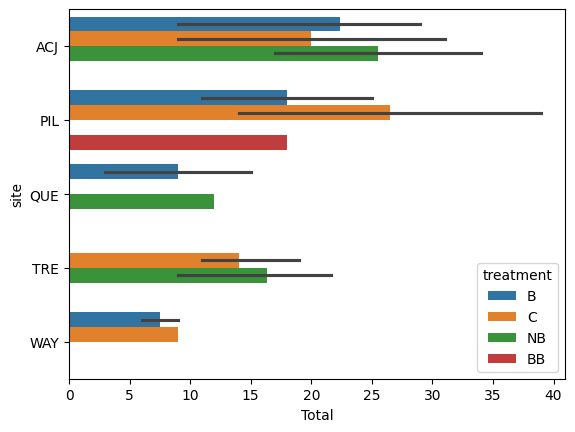

In [176]:
sns.barplot(x="Total", y="site", hue="treatment", data=c_tarmensis_leaf_area_group_counts)

## Gerando plotagens das variáveis associadas ao grupo (área foliar)

Ainda apenas para os dados de *C. tarmensis* vamos olhar um pouco para os dados em cada um dos grupos:

<Axes: xlabel='site', ylabel='value'>

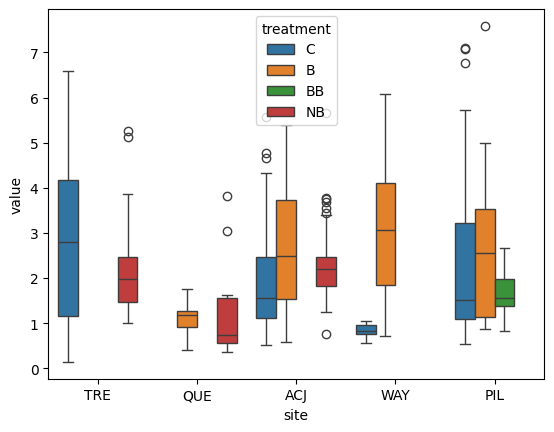

In [177]:
sns.boxplot(x="site", y="value", hue="treatment", data=pftc5_functional_traits_clean_c_tarmensis[pftc5_functional_traits_clean_c_tarmensis['trait'] == 'leaf_area_cm2'])

# Referências

* McKinney, Wes. Python para análise de dados: Tratamento de dados com Pandas, NumPy e IPython. Novatec Editora, 2018.
* Halbritter, Aud H., et al. "Plant trait and vegetation data along a 1314 m elevation gradient with fire history in Puna grasslands, Perú." Scientific Data 11.1 (2024): 225.